In [1]:
!pip install pykan

In [6]:
import torch

In [3]:
import kan

In [4]:
from kan import *


In [5]:
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0)

In [7]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2)
dataset['train_input'].shape, dataset['train_label'].shape


(torch.Size([1000, 2]), torch.Size([1000, 1]))

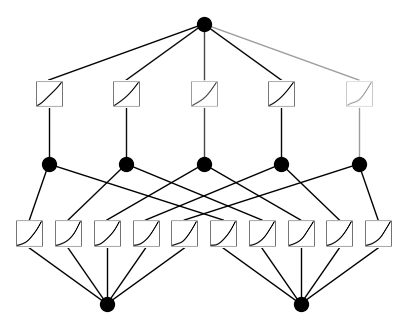

In [8]:
# plot KAN at initialization
model(dataset['train_input']);
model.plot(beta=100)

In [9]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10.);

train loss: 1.33e-01 | test loss: 1.45e-01 | reg: 2.73e+01 : 100%|██| 20/20 [00:18<00:00,  1.06it/s]


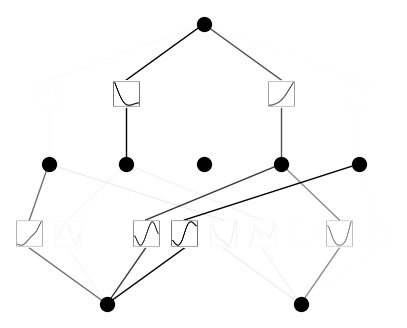

In [10]:
model.plot()

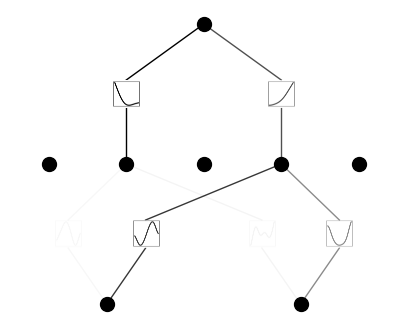

In [11]:
model.prune()
model.plot(mask=True)

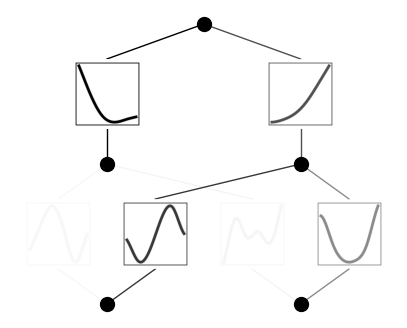

In [12]:
model = model.prune()
model(dataset['train_input'])
model.plot()

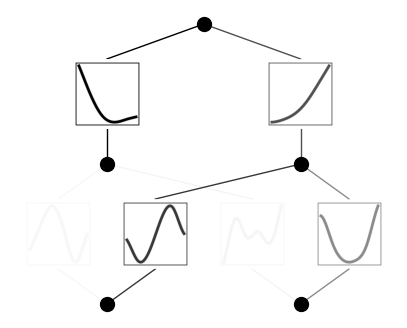

In [13]:
model = model.prune()
model(dataset['train_input'])
model.plot()

In [14]:
#Continue training and replot
model.train(dataset, opt="LBFGS", steps=50);

train loss: 2.61e-03 | test loss: 2.71e-03 | reg: 9.60e+00 : 100%|██| 50/50 [00:19<00:00,  2.61it/s]


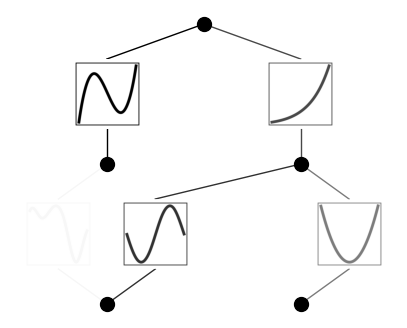

In [15]:
model.plot()

In [23]:
#automatically or manually set activation functions to be symbolic
mode = "auto" # "manual"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp','log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)

skipping (0,0,0) since already symbolic
skipping (0,0,1) since already symbolic
skipping (0,1,0) since already symbolic
skipping (0,1,1) since already symbolic
skipping (1,0,0) since already symbolic
skipping (1,1,0) since already symbolic


In [21]:
#Continue training to almost machine precision
model.train(dataset, opt="LBFGS", steps=50);

train loss: 2.81e-07 | test loss: 2.97e-07 | reg: 8.38e+02 : 100%|██| 50/50 [00:04<00:00, 10.42it/s]


In [22]:
model.symbolic_formula()[0][0]

1.0*exp(1.0*x_2**2 + 1.0*sin(3.14*x_1))